In [1]:

import torch
from torch import nn 
import pandas as pd 
import numpy as np 
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt 
from tqdm.auto import tqdm


In [2]:
training_data = datasets.FashionMNIST(
    root="data", 
    train=True,
    download=True,
    transform=ToTensor(),
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
type(training_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

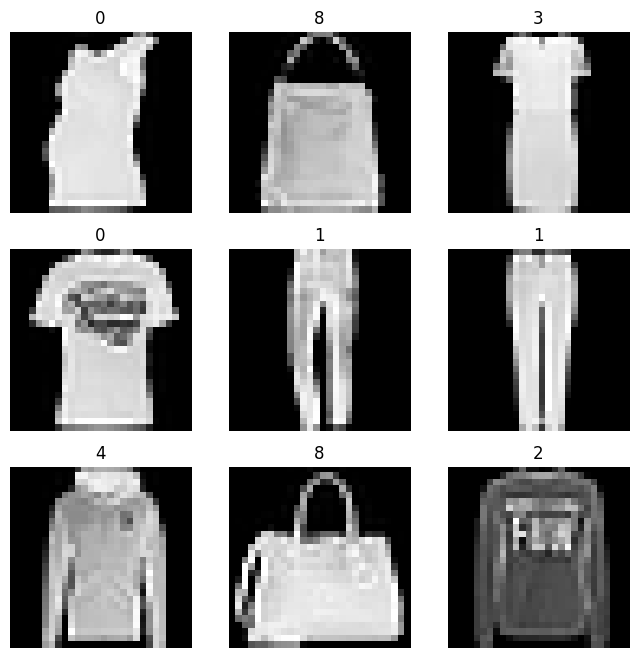

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [6]:
train = next(iter(train_dataloader))
train

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [7]:
img, label = next(iter(train_dataloader))
label.size()

torch.Size([32])

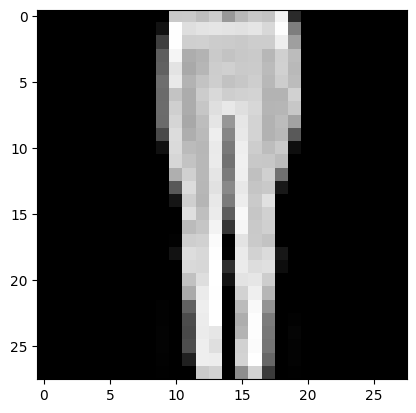

In [8]:
plt.imshow(img[0].squeeze(), cmap="gray")

In [9]:
class FashCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 28x28
            nn.ReLU(),
            nn.MaxPool2d(2),                 # 14x14

            nn.Conv2d(16, 32, 3, padding=1), # 14x14
            nn.ReLU(),
            nn.MaxPool2d(2),                 # 7x7
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [10]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = FashCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 20

for epoch in range(epochs):
    model.train()
    loss_val = 0.0

    for X_train, y_train in tqdm(train_dataloader):
        X_train = X_train.to(device)
        y_train = y_train.to(device)

        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        loss_val += loss.item()

    print(f"Epoch {epoch+1}: Loss = {loss_val / len(train_dataloader):.4f}")


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 1: Loss = 0.4691


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 2: Loss = 0.3015


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 3: Loss = 0.2595


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 4: Loss = 0.2298


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 5: Loss = 0.2058


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 6: Loss = 0.1866


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 7: Loss = 0.1686


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 8: Loss = 0.1514


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 9: Loss = 0.1376


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 10: Loss = 0.1224


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 11: Loss = 0.1095


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 12: Loss = 0.0988


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 13: Loss = 0.0875


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 14: Loss = 0.0786


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 15: Loss = 0.0698


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 16: Loss = 0.0611


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 17: Loss = 0.0552


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 18: Loss = 0.0499


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 19: Loss = 0.0456


  0%|          | 0/1875 [00:00<?, ?it/s]

Epoch 20: Loss = 0.0398


In [11]:
torch.save(model.state_dict(), "trained_fash.pth")

In [12]:
model = FashCNN().to(device)
model.load_state_dict(torch.load("trained_fash.pth"))

<All keys matched successfully>

In [13]:
correct = 0
total = 0
model.eval()
with torch.inference_mode(): 
    for X_test, y_test in tqdm(test_dataloader):
        output = model(X_test.to(device))
        values, predicted = torch.max(output, 1)
        total +=len(y_test.to(device))
        correct += (predicted == y_test.to(device)).sum().item()*100
        print(f"Accuracy: {correct /total: .3f}%")

  0%|          | 0/313 [00:00<?, ?it/s]

Accuracy:  87.500%
Accuracy:  87.500%
Accuracy:  86.458%
Accuracy:  89.062%
Accuracy:  89.375%
Accuracy:  89.583%
Accuracy:  88.839%
Accuracy:  89.844%
Accuracy:  89.931%
Accuracy:  90.000%
Accuracy:  88.920%
Accuracy:  89.323%
Accuracy:  89.423%
Accuracy:  89.509%
Accuracy:  89.375%
Accuracy:  89.844%
Accuracy:  89.890%
Accuracy:  90.104%
Accuracy:  89.638%
Accuracy:  89.375%
Accuracy:  89.583%
Accuracy:  89.773%
Accuracy:  89.538%
Accuracy:  89.844%
Accuracy:  90.000%
Accuracy:  90.264%
Accuracy:  90.509%
Accuracy:  90.625%
Accuracy:  90.517%
Accuracy:  90.417%
Accuracy:  90.524%
Accuracy:  90.625%
Accuracy:  90.909%
Accuracy:  91.176%
Accuracy:  91.071%
Accuracy:  91.059%
Accuracy:  91.132%
Accuracy:  91.201%
Accuracy:  91.426%
Accuracy:  91.484%
Accuracy:  91.616%
Accuracy:  91.518%
Accuracy:  91.642%
Accuracy:  91.832%
Accuracy:  91.736%
Accuracy:  91.644%
Accuracy:  91.489%
Accuracy:  91.667%
Accuracy:  91.709%
Accuracy:  91.812%
Accuracy:  91.667%
Accuracy:  91.526%
Accuracy:  9

In [14]:
x = torch.tensor([[1, 2, 4, 5]])
print(torch.max(x, 1))

torch.return_types.max(
values=tensor([5]),
indices=tensor([3]))
